# Analysing Github User Interactions

### Project by S. Dhanya Abhirami

In [1]:
from github import Github

# Specify your own access token here

ACCESS_TOKEN = '80b80e8ce1440f4c4a0d0b84f7633327bf7f7c8c'

client = Github(ACCESS_TOKEN, per_page=100)

## 1. Repository Specific Analysis

In [2]:
# Specify a username and repository of interest for that user.

USER = 'ahmadawais'
REPO = 'hacktoberfest'

user = client.get_user(USER)
repo = user.get_repo(REPO)

### Visualising Stargazer Network

Number of stargazers 56


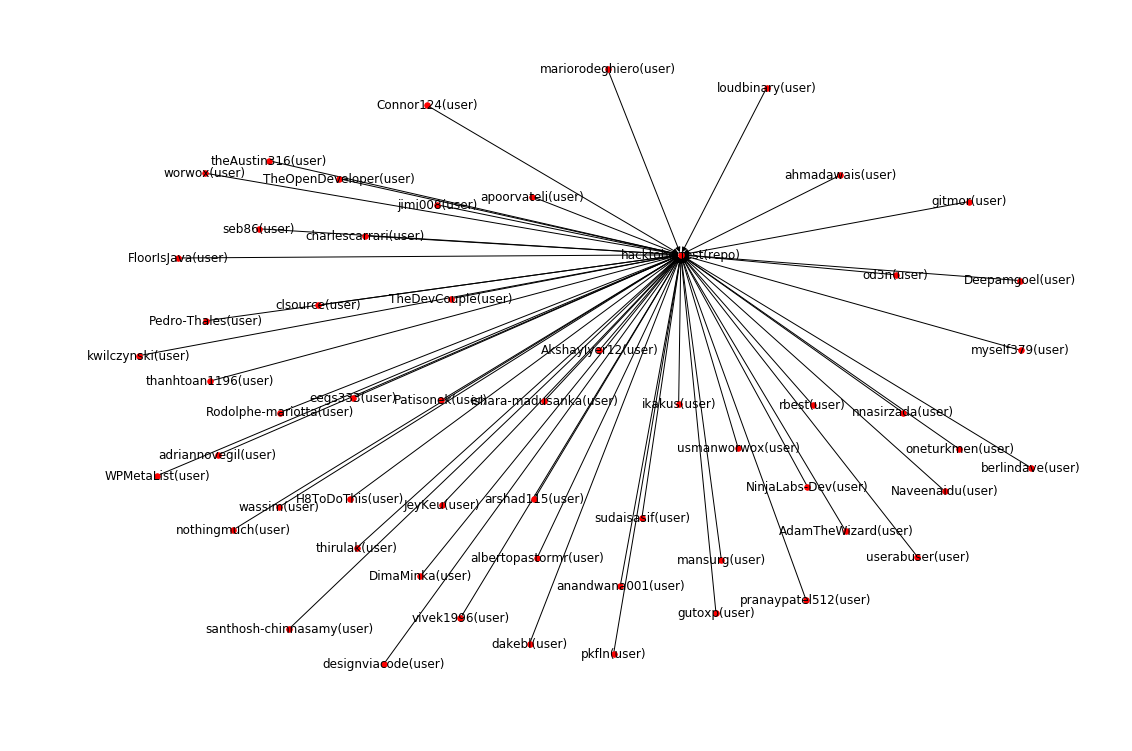

In [3]:
import networkx as nx

g_stargazers = nx.DiGraph()

g_stargazers.add_node(repo.name + '(repo)', type='repo', lang=repo.language, owner=user.login)

stargazers = [ s for s in repo.get_stargazers() ]
print ("Number of stargazers", len(stargazers))
for sg in stargazers:
    g_stargazers.add_node(sg.login + '(user)', type='user')
    g_stargazers.add_edge(sg.login + '(user)', repo.name + '(repo)', type='gazes')

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
nx.draw(g_stargazers, with_labels=True, node_size=30)
plt.show()

### Visualising Forks Network

Number of forks 102


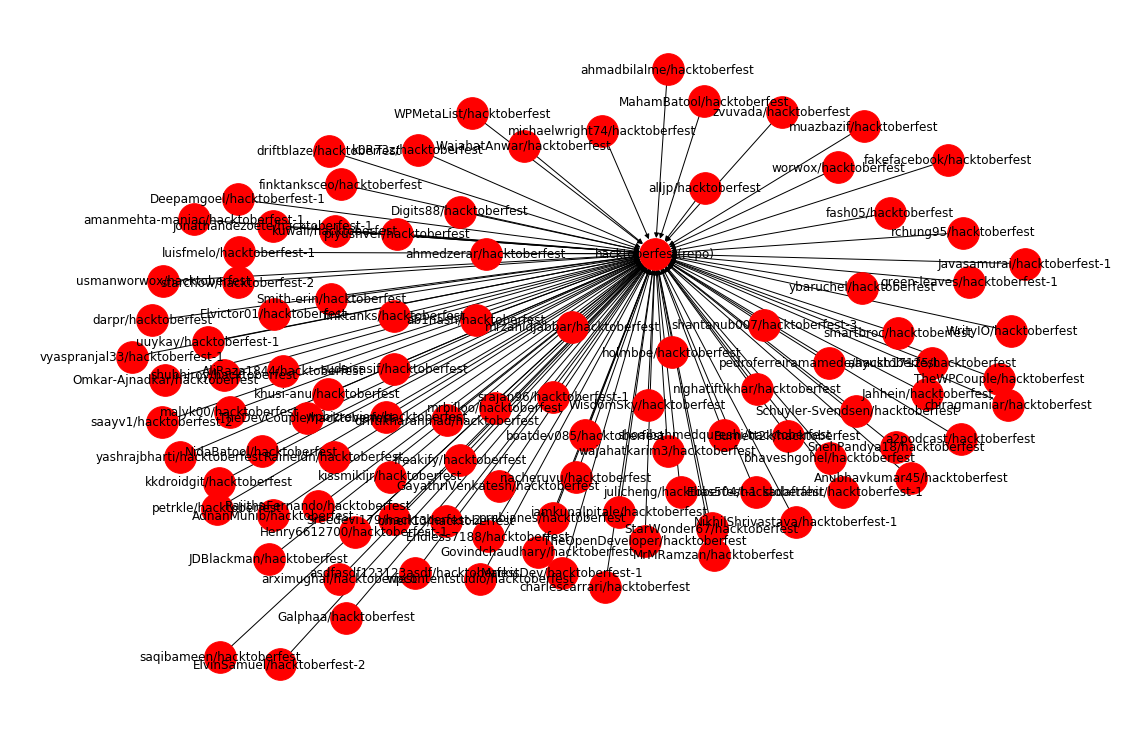

In [4]:
import networkx as nx

g_forks = nx.DiGraph()

g_forks.add_node(repo.name + '(repo)', type='repo', lang=repo.language, owner=user.login)
# Get a list of people who have bookmarked the repo.
# Since you'll get a lazy iterator back, you have to traverse
# it if you want to get the total number of stargazers.

forks = [ s for s in repo.get_forks() ]
print ("Number of forks", len(forks))
for fork in forks:
    g_forks.add_node(fork.full_name , type='user')
    g_forks.add_edge(fork.full_name, repo.name + '(repo)', type='forks')

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
nx.draw(g_forks, with_labels=True, node_size=1000)
plt.show()

## 2. User Specific Analysis

In [5]:
# Specify a username

USER = 'Dhanya-Abhirami'

user = client.get_user(USER)

### Creating Follower Network

Number of followers 14


/home/dhanya/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


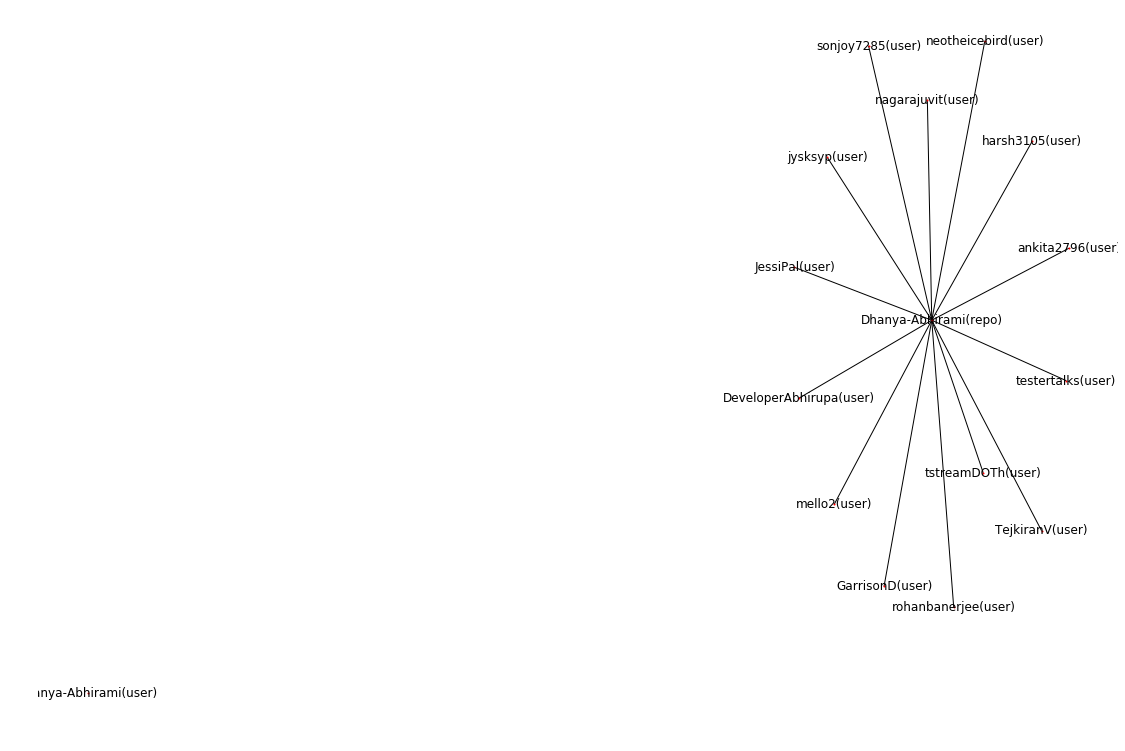

In [6]:
import networkx as nx

g_followers = nx.Graph()

g_followers.add_node(user.login + '(user)', type='user')
# Get a list of people who have bookmarked the repo.
# Since you'll get a lazy iterator back, you have to traverse
# it if you want to get the total number of stargazers.

followers = [ s for s in user.get_followers() ]
print ("Number of followers", len(followers))
for follower in followers:
    g_followers.add_node(follower.login + '(user)', type='user')
    g_followers.add_edge(follower.login + '(user)', user.login + '(repo)', type='follows')
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
nx.draw(g_followers, with_labels=True, node_size=1)
plt.show()

### Adding Followers' followers

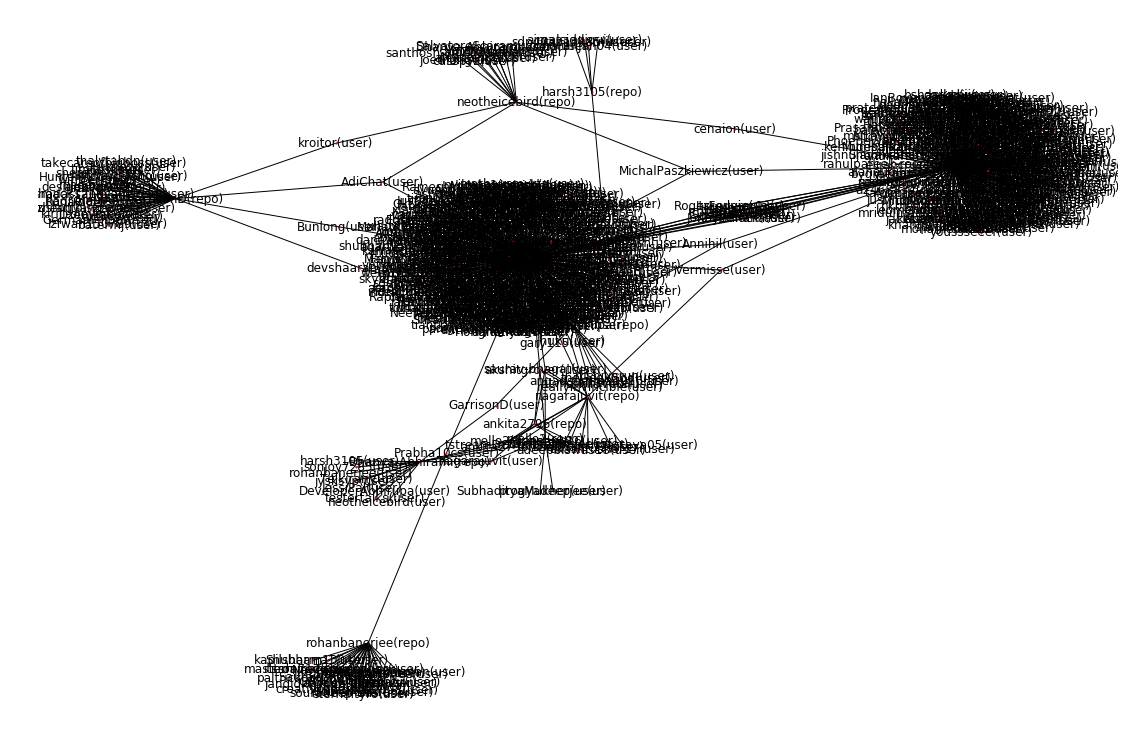

In [7]:
for follower in followers:
    followers_2 = [ s for s in follower.get_followers() ]
    for follower_2 in followers_2:
        g_followers.add_node(follower_2.login + '(user)', type='user')
        g_followers.add_edge(follower_2.login + '(user)', follower.login + '(repo)', type='follows')
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
nx.draw(g_followers, with_labels=True, node_size=1)
plt.show()

In [8]:
print (nx.info(g_followers))

Name: 
Type: Graph
Number of nodes: 639
Number of edges: 675
Average degree:   2.1127


### Who is central?

In [9]:
from operator import itemgetter
from IPython.display import HTML
from IPython.core.display import display

print ("Degree Centrality")
print (sorted(nx.degree_centrality(g_followers).items(),key=itemgetter(1), reverse=True)[:10])

print ("Betweenness Centrality")
print (sorted(nx.betweenness_centrality(g_followers).items(), key=itemgetter(1), reverse=True)[:10])

print ("Closeness Centrality")
print (sorted(nx.closeness_centrality(g_followers).items(), key=itemgetter(1), reverse=True)[:10])

Degree Centrality
[('tstreamDOTh(repo)', 0.49059561128526646), ('JessiPal(repo)', 0.35893416927899685), ('GarrisonD(repo)', 0.05172413793103448), ('rohanbanerjee(repo)', 0.04075235109717868), ('Dhanya-Abhirami(repo)', 0.0219435736677116), ('nagarajuvit(repo)', 0.0219435736677116), ('neotheicebird(repo)', 0.0219435736677116), ('DeveloperAbhirupa(repo)', 0.017241379310344827), ('mello2(repo)', 0.01567398119122257), ('ankita2796(repo)', 0.009404388714733543)]
Betweenness Centrality
[('tstreamDOTh(repo)', 0.7973761936854545), ('JessiPal(repo)', 0.5637547388679166), ('GarrisonD(repo)', 0.09109575978247911), ('Prabha10cs(user)', 0.07830593052267928), ('rohanbanerjee(repo)', 0.07689354979995373), ('Annihil(user)', 0.06253107618156148), ('Vermisse(user)', 0.05455203412309689), ('AdiChat(user)', 0.05358611439734029), ('DeveloperAbhirupa(repo)', 0.04913526519011101), ('MichalPaszkiewicz(user)', 0.0483269774689998)]
Closeness Centrality
[('tstreamDOTh(repo)', 0.4877675840978593), ('Annihil(user)'

### PageRank

In [10]:
import operator
pr = nx.pagerank(g_followers)
sorted_x = sorted(pr.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_x[:10])

[('tstreamDOTh(repo)', 0.21599046881718031), ('JessiPal(repo)', 0.15967158876170648), ('GarrisonD(repo)', 0.0228902642394741), ('rohanbanerjee(repo)', 0.01911713570517394), ('neotheicebird(repo)', 0.00937800157975005), ('Dhanya-Abhirami(repo)', 0.00817173414487429), ('DeveloperAbhirupa(repo)', 0.00712250869224035), ('nagarajuvit(repo)', 0.00687671737194319), ('mello2(repo)', 0.004797685606591924), ('harsh3105(repo)', 0.003906493776017948)]


### Hub and Authority Scores

In [11]:
hub, authority = nx.hits(g_followers)
sorted_hub = sorted(hub.items(), key=operator.itemgetter(1),reverse=True)
print("Most Influential Users based on Hub Score")
print(sorted_hub[:10])
print()
sorted_authority = sorted(authority.items(), key=operator.itemgetter(1),reverse=True)
print("Most Influential Users based on Authority Score")
print(sorted_authority[:10])

Most Influential Users based on Hub Score
[('Vermisse(user)', 0.0033407025120889026), ('MichalPaszkiewicz(user)', 0.003312996466552139), ('Annihil(user)', 0.003311292223577415), ('RogerFederer03(user)', 0.003291002718327514), ('ItzLevvie(user)', 0.003291002718327514), ('rmbernardi(user)', 0.003291002718327514), ('catb0y(user)', 0.003291002718327514), ('toir427(user)', 0.003291002718327514), ('nfultz(user)', 0.003291002718327514), ('rftHusn(user)', 0.003291002718327514)]

Most Influential Users based on Authority Score
[('tstreamDOTh(repo)', 0.41375213380467485), ('JessiPal(repo)', 0.06264082685025928), ('nagarajuvit(repo)', 0.007194351971231389), ('neotheicebird(repo)', 0.003183730835066849), ('GarrisonD(repo)', 0.002966035907870466), ('DeveloperAbhirupa(repo)', 0.002937031143242603), ('mello2(repo)', 0.0029243591948106416), ('ankita2796(repo)', 0.002841316787745073), ('Vermisse(user)', 0.0016766789882768187), ('MichalPaszkiewicz(user)', 0.0016627734865955772)]


## Detecting Communities

In [12]:
from networkx.algorithms.community.centrality import girvan_newman
import itertools
comp = girvan_newman(g_followers) 
k = 5
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
print("Number of users in community")
i=1
for communities in limited:
    print("\nIteration",i,"\n\n")
    i+=1
    for c in communities:
        print(len(c))

Number of users in community

Iteration 1 


612
27

Iteration 2 


63
549
27

Iteration 3 


63
323
226
27

Iteration 4 


63
30
226
293
27
